In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('../data/main_df.csv', index_col=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 0 to 1187
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_cd       1188 non-null   int64  
 1   gu            1188 non-null   object 
 2   temperature   1186 non-null   float64
 3   humidity      1186 non-null   float64
 4   avg_re_dust   1188 non-null   float64
 5   PM10          1188 non-null   int64  
 6   PM25          1188 non-null   int64  
 7   O3            1188 non-null   float64
 8   NO2           1188 non-null   float64
 9   CO            1188 non-null   float64
 10  SO2           1188 non-null   float64
 11  TOT_LVPOP_CO  1188 non-null   float64
 12  stop_cnt      1188 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 129.9+ KB


In [12]:
df = df.dropna()

In [13]:
df.head()

,date_cd,gu,temperature,humidity,avg_re_dust,PM10,PM25,O3,NO2,CO,SO2,TOT_LVPOP_CO,stop_cnt
0,20180327,은평구,18.833333,53.583333,79.750000,95,63,0.036,0.044,0.6,0.006,442351.062267,566
1,20180510,은평구,21.000000,55.500000,118.500000,47,31,0.038,0.022,0.4,0.004,437636.314354,566
2,20180514,은평구,19.500000,80.833333,46.916667,90,74,0.034,0.031,0.7,0.004,444733.789129,566
3,20180628,은평구,28.416667,79.166667,57.333333,26,21,0.025,0.023,0.5,0.003,444209.441225,566
4,20180808,은평구,36.000000,55.000000,70.500000,28,22,0.030,0.011,0.3,0.003,433600.707667,566


/var/folders/y7/1tyjgy5d06j24sgnk95_sdt80000gn/T/ipykernel_8116/3823669384.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


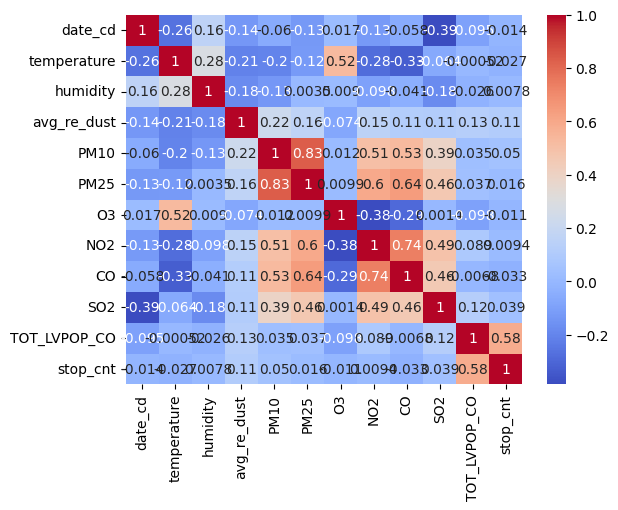

In [14]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [16]:
model_df = df.drop(['date_cd', 'gu'], axis=1)

In [17]:
from sklearn.ensemble import RandomForestRegressor

X = model_df.drop('avg_re_dust', axis=1).to_numpy()
Y = model_df['avg_re_dust'].to_numpy()

In [18]:
cols = np.array(model_df.drop('avg_re_dust', axis=1).columns)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 531)
print(len(xTrain), len(xTest))
mseOos = []
param1 = []
param2 = []
nTreeList = range(50, 500, 10)
md_list = [3, 5, 7, 11]

for iTrees in nTreeList:
    for md in md_list:
        model = RandomForestRegressor(n_estimators=iTrees,
                        max_depth=md, random_state=0)
        model.fit(xTrain, yTrain)
        #데이터 세트에 대한 MSE 누적
        prediction = model.predict(xTest)
        
        param1.append(iTrees)
        param2.append(md)
        mseOos.append(mean_squared_error(yTest, prediction))

830 356


In [20]:
result = pd.DataFrame({'trees': param1, 'max_depth': param2, 'mse': mseOos})

In [21]:
result.sort_values('mse')

,trees,max_depth,mse
0,50,3,3833.110084
76,240,3,3864.251078
88,270,3,3864.858257
84,260,3,3864.963117
80,250,3,3866.225936
...,...,...,...
26,110,7,4053.289137
14,80,7,4066.723941
27,110,11,4069.415344
5,60,5,4109.025205


In [24]:
df

,date_cd,gu,temperature,humidity,avg_re_dust,PM10,PM25,O3,NO2,CO,SO2,TOT_LVPOP_CO,stop_cnt
0,20180327,은평구,18.833333,53.583333,79.750000,95,63,0.036,0.044,0.6,0.006,442351.062267,566
1,20180510,은평구,21.000000,55.500000,118.500000,47,31,0.038,0.022,0.4,0.004,437636.314354,566
2,20180514,은평구,19.500000,80.833333,46.916667,90,74,0.034,0.031,0.7,0.004,444733.789129,566
3,20180628,은평구,28.416667,79.166667,57.333333,26,21,0.025,0.023,0.5,0.003,444209.441225,566
4,20180808,은평구,36.000000,55.000000,70.500000,28,22,0.030,0.011,0.3,0.003,433600.707667,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,20221007,서대문구,18.750000,57.625000,11.500000,10,3,0.016,0.007,0.2,0.003,359811.705508,530
1184,20221031,서대문구,19.750000,48.250000,14.750000,21,10,0.027,0.017,0.5,0.004,365893.268479,530
1185,20221205,서대문구,0.250000,27.750000,21.750000,20,10,0.019,0.019,0.8,0.004,370095.394779,530
1186,20230131,서대문구,6.250000,49.500000,10.250000,37,13,0.017,0.031,0.5,0.004,359881.537546,530


In [27]:
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=0)

# 모델 학습
rf.fit(xTrain, yTrain)

# 테스트 데이터 예측
y_pred = rf.predict(xTest)

# R-squared 계산
r2_score(yTest, y_pred)

0.08492824697811419

In [30]:
df.describe()

,date_cd,temperature,humidity,avg_re_dust,PM10,PM25,O3,NO2,CO,SO2,TOT_LVPOP_CO,stop_cnt
count,1.186000e+03,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,2.020394e+07,17.863170,51.118232,47.110471,40.956998,23.004216,0.027164,0.026417,0.486425,0.003508,446833.408943,516.661046
std,1.523736e+04,10.434670,16.625994,63.181789,27.534601,17.108514,0.013482,0.012558,0.186985,0.001250,160095.012730,119.046825
min,2.018033e+07,-9.833333,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,219526.812733,246.000000
25%,2.019051e+07,9.785256,38.458333,16.405263,25.000000,12.000000,0.018000,0.017000,0.400000,0.003000,347540.876981,404.000000
50%,2.021011e+07,17.256579,50.000000,27.736111,35.000000,19.000000,0.026000,0.024500,0.500000,0.003000,407140.477071,509.000000
75%,2.022031e+07,27.234375,62.178030,54.000000,51.000000,29.000000,0.036000,0.034000,0.600000,0.004000,500802.618694,605.000000
max,2.023033e+07,39.500000,100.000000,1102.000000,287.000000,143.000000,0.079000,0.080000,1.600000,0.009000,900215.364017,695.000000


In [38]:
df[df['avg_re_dust']>100]['gu'].value_counts()

강서구     19
송파구     16
영등포구    11
관악구     10
마포구      8
금천구      7
은평구      6
서초구      6
구로구      6
양천구      5
강남구      5
동작구      4
성북구      4
노원구      3
종로구      3
강북구      3
광진구      2
도봉구      2
중랑구      2
서대문구     2
중구       1
Name: gu, dtype: int64